In [51]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/workspaces/naive-bayes-project-tutorial-omass/playstore_reviews.csv')

# Drop the package_name column
df.drop('package_name', axis=1, inplace=True)

# Converting text to lowercase and removing leading/trailing spaces
df['review'] = df['review'].str.strip().str.lower()


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['polarity'], test_size=0.2, random_state=42)

# Transforming text into a word count matrix
vec_model = CountVectorizer(stop_words="english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()


In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_accuracy = accuracy_score(y_test, gnb_model.predict(X_test))

# Printing the accuracy
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy * 100:.2f}%")

# Multinomial Naive Bayes
# Multinomial Naive Bayes model with hyperparameters
mnb_model = MultinomialNB(alpha=0.5, fit_prior=True)
mnb_model.fit(X_train, y_train)
mnb_accuracy = accuracy_score(y_test, mnb_model.predict(X_test))

# Printing the accuracy
print(f"Multinomial Naive Bayes Accuracy: {mnb_accuracy * 100:.2f}%")

# Bernoulli Naive Bayes
# Bernoulli Naive Bayes model with hyperparameters
bnb_model = BernoulliNB(alpha=0.5, binarize=0.0)
bnb_model.fit(X_train, y_train)
bnb_accuracy = accuracy_score(y_test, bnb_model.predict(X_test))

# Printing the accuracy
print(f"Bernoulli Naive Bayes Accuracy: {bnb_accuracy * 100:.2f}%")



Gaussian Naive Bayes Accuracy: 80.45%
Multinomial Naive Bayes Accuracy: 82.68%
Bernoulli Naive Bayes Accuracy: 80.45%


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Simplified hyperparameter grid
param_grid_rf_simplified = {
    'n_estimators': [100, 150],  # Reduced number of trees options
    'max_depth': [10, None]      # Maximum depth of the tree, with None allowing full growth
}

# Creating a GridSearchCV object with the simplified grid
grid_search_rf_simplified = GridSearchCV(RandomForestClassifier(random_state=42), 
                                         param_grid_rf_simplified, 
                                         cv=3, 
                                         scoring='accuracy')

# Fitting the model to the data with the simplified grid
grid_search_rf_simplified.fit(X_train, y_train)

# Best parameters and best accuracy score
best_params_rf_simplified = grid_search_rf_simplified.best_params_
best_rf_model_simplified = grid_search_rf_simplified.best_estimator_
rf_accuracy_simplified = accuracy_score(y_test, best_rf_model_simplified.predict(X_test))

# Printing the best parameters and the accuracy
print("Best Parameters for RandomForestClassifier:", best_params_rf_simplified)
print(f"Random Forest Classifier Accuracy with Best Parameters: {rf_accuracy_simplified * 100:.2f}%")



Best Parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 100}
Random Forest Classifier Accuracy with Best Parameters: 79.89%


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Training a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Printing the accuracy
print(f"Decision Tree Classifier Accuracy: {dt_accuracy * 100:.2f}%")


Decision Tree Classifier Accuracy: 71.51%


In [56]:
from sklearn.svm import SVC

# Training a Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Printing the accuracy
print(f"Support Vector Machine (SVM) Accuracy: {svm_accuracy * 100:.2f}%")


Support Vector Machine (SVM) Accuracy: 80.45%


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        


In [58]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Grid search for hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train)

# Best model
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Best parameters
best_params_xgb = grid_search_xgb.best_params_

# Calculating accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Best Params:", best_params_xgb)
print("XGBoost Accuracy:", accuracy_xgb)


XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost Accuracy: 0.7932960893854749


Accuracy: 0.8379888268156425
Precision: 0.75
Recall: 0.6792452830188679
F1 Score: 0.712871287128713
ROC AUC: 0.8623839472896077


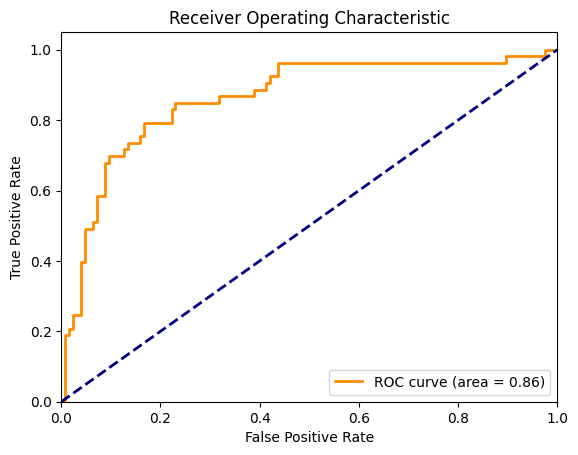

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt



# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['polarity'], test_size=0.2, random_state=42)

# Transforming text into a matrix of token counts
vec_model = CountVectorizer(stop_words="english")
X_train_counts = vec_model.fit_transform(X_train)
X_test_counts = vec_model.transform(X_test)

# Standardizing the features
scaler = StandardScaler(with_mean=False)  # with_mean=False to support sparse input
X_train_scaled = scaler.fit_transform(X_train_counts)
X_test_scaled = scaler.transform(X_test_counts)

# Hyperparameter tuning using grid search
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

# Best model from grid search
best_lr_model = grid_search_lr.best_estimator_

# Predicting on the test set
y_pred_lr = best_lr_model.predict(X_test_scaled)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_lr_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Printing the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [68]:
import pickle
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define a list of model names and their corresponding trained models
models_to_save = [
    ("decision_tree_model", dt_model),  
    ("random_forest_model", best_params_rf_simplified),
    ("logistic_regression_model", best_lr_model),
    ("support_vector_machine_model", svm_model),
    ("gaussian_naive_bayes_model", gnb_model),
    ("multinomial_naive_bayes_model", mnb_model),
    ("bernoulli_naive_bayes_model", bnb_model),
    ("xgboost_model", best_xgb_model)  
]

# Loop through the list and save each model
for model_name, model in models_to_save:
    with open(f"{model_name}.sav", "wb") as model_file:
        pickle.dump(model, model_file)


